#Lecture 2 - On-Line Financial Data - Financial Ratio Analysis 

* Using YFinance library
* Upload csvc file
* Looping a Task
* Creating a DataFrame (like an Excel Spreadsheet)
* Performing Calculations
* Graphing Data


The goal of this notebook is to show how to get the financial data (total assets and total revenue) from Yahoo Finance via Python's `yfinance` package:

[https://pypi.org/project/yfinance/](https://pypi.org/project/yfinance/)


Note that the will need to create a file with the list of ticker. In this example, we will use ticker1.csv which contains the ticker symbol for 5 companies. 

The steps that this ipynb shows are below: 

1.   Load the CSV file with the tickers data and convert it to list format. 
2.   Loop through the list of tickers and get the total assets and revenue data via `yfinance`. 
3.   Convert the data to a Pandas dataframe
4.   Calculate the Asset Turnover Ratio (TO=Revenues/Total Assets)
5.   Graph TO ratios for the 4 companies. 

Unlike `numpy` or `pandas` libraries, Colab doesn't have `yfinance` library preinstalled, we can install it via `pip`. 

In [ ]:
!pip install yfinance

Load the libraries. 

In [ ]:
import os
import pandas as pd
import yfinance as yf

Set the working directory. 


Load the `ticker_lect2.csv` file and convert it to list.




In [ ]:
tickers = pd.read_csv('ticker_lect2.csv') # load tickers.csv 
tickers = tickers.Ticker.to_list() # convert ticker to list 
tickers[:5] # see the first 5 tickers in the list

['AAPL', 'MSFT', 'TSLA', 'AMZN']

Loop through the list of tickers and get the total assets and revenue data. 

If you want to loop through the whole list use `for t in tickers:`, though note that looping through hundreads of tickers might take hours.

In [ ]:
ta = {} # empty dictionary for total assets
rev = {} # empty dictionary for revenue

# The loop goes over the tickers and gets the respective variables
for t in tickers[:5]: # for example purposes the list is limited to the first 5 items
  try: # there are ticker name mismatch cases, to avoid interruption we skip such cases 
    ticker = yf.Ticker(t) 
    print(ticker) # this prints the ticker in progress
    ta[t] = ticker.balance_sheet.loc[['Total Assets']].iloc[:, 0] # we are getting the data for the last financial year which is in iloc[:, 0] position
    rev[t] = ticker.financials.loc[['Total Revenue']].iloc[:, 0]
  except: 
    pass

yfinance.Ticker object <AAPL>
yfinance.Ticker object <MSFT>
yfinance.Ticker object <TSLA>
yfinance.Ticker object <AMZN>


In [ ]:
# check the dictionaries 
print(ta)
print(rev)

{'AAPL': Total Assets    3.510020e+11
Name: 2021-09-25 00:00:00, dtype: float64, 'MSFT': Total Assets    3.337790e+11
Name: 2021-06-30 00:00:00, dtype: float64, 'TSLA': Total Assets    6.213100e+10
Name: 2021-12-31 00:00:00, dtype: float64, 'AMZN': Total Assets    4.205490e+11
Name: 2021-12-31 00:00:00, dtype: float64}
{'AAPL': Total Revenue    365817000000.0
Name: 2021-09-25 00:00:00, dtype: object, 'MSFT': Total Revenue    168088000000.0
Name: 2021-06-30 00:00:00, dtype: object, 'TSLA': Total Revenue    53823000000.0
Name: 2021-12-31 00:00:00, dtype: object, 'AMZN': Total Revenue    469822000000.0
Name: 2021-12-31 00:00:00, dtype: object}


In [ ]:
ta_data = pd.DataFrame.from_dict(ta, orient='index') # convert the dictionary to dataframe
ta_data.index.name = 'Ticker'
# ta.to_csv(r'ta.csv', index = True, header=True) # save the file into your working directory
ta_data


,Total Assets
Ticker,
AAPL,3.510020e+11
AMZN,4.205490e+11
MSFT,3.337790e+11
TSLA,6.213100e+10


In [ ]:
rev_data = pd.DataFrame.from_dict(rev, orient='index')
rev_data.index.name = 'Ticker'
# rev.to_csv(r'rev.csv', index = True, header=True)
rev_data

,Total Revenue
Ticker,
AAPL,3.658170e+11
AMZN,4.698220e+11
MSFT,1.680880e+11
TSLA,5.382300e+10


In [ ]:
to_data=ta_data.join(rev_data)


In [ ]:
###T/O means turnover ratio. which = Total revenue/Total Assets

In [ ]:
to_data1 = (to_data['Total Revenue'] / to_data['Total Assets']).to_frame('TO')
to_data1

,TO
Ticker,
AAPL,1.042208
AMZN,1.117164
MSFT,0.503591
TSLA,0.866283


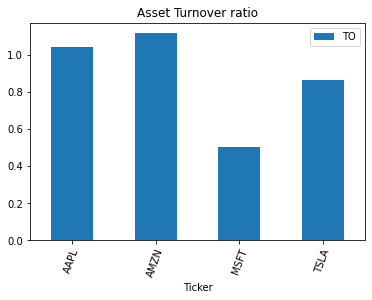

In [ ]:
import pandas as pd

import matplotlib.pyplot as plot
 

# Draw a vertical bar chart

to_data1.plot.bar(y="TO", rot=70, title="Asset Turnover ratio");

plot.show(block=True);